#### $\text{X} \sim \text{Unif}(0, ~1) \to\quad \text{if}~~ ~ Y = \sin(2\pi X)\to \text{denstiy of }~~Y = ?$

In [1]:
import numpy as np
from sympy import*

In [31]:
from sympy.stats import Uniform, density, cdf, E, variance, ContinuousRV

In [3]:
X = Uniform("x", 0, 1)

In [4]:
pi = Symbol("pi", positive=True)
x, y = symbols('x y')

In [5]:
density(X)(x)

Piecewise((1, (x >= 0) & (x <= 1)), (0, True))

In [6]:
cdf(X)(x)

Piecewise((0, x < 0), (x, x <= 1), (1, True))

In [7]:
E(X)

1/2

In [8]:
variance(X)

1/12

In [9]:
cdf(X)(sin(2 * pi * y))

Piecewise((0, sin(2*pi*y) < 0), (sin(2*pi*y), sin(2*pi*y) <= 1), (1, True))

In [10]:
pDf = 1/pi * 1/sqrt(1 - y**2)
pDf

1/(pi*sqrt(1 - y**2))

In [11]:
integrate(pDf, y)

asin(y)/pi

<br><br><br><br>
<br><b>
<div style = "color:red;">

#### Create A Trigonometric Circle for explain Problem 
#### define a class for this issue...
<br><br></b></div>

In [12]:
import math
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.axisartist import SubplotZero


class TrigAxes():
    
    def __init__(self, figsize=(12,5)):
        self.xlim = (-1.2, 1.2)
        self.ylim = (-1.2, 1.2)
        self.figsize  = figsize
        self.angles   = []
        self.scale_arrows()

    def __arrow__(self, x, y, dx, dy, width, length):
        plt.arrow(
            x, y, dx, dy, 
            color       = 'k',
            clip_on     = False, 
            head_width  = self.head_width, 
            head_length = self.head_length
        ) 
        
    def __drawAxis__(self):
        """
        Draws the 2D cartesian axis
        """
        # A subplot with two additional axis, "xzero" and "yzero"
        # corresponding to the cartesian axis
        ax = SubplotZero(self.fig, 1, 1, 1)
        self.fig.add_subplot(ax)
        
        # make xzero axis (horizontal axis line through y=0) visible.
        for axis in ["xzero","yzero"]:
            ax.axis[axis].set_visible(True)
        # make the other axis (left, bottom, top, right) invisible
        for n in ["left", "right", "bottom", "top"]:
            ax.axis[n].set_visible(False)
            
        # Plot limits
        plt.xlim(self.xlim)
        plt.ylim(self.ylim)
        
        # No ticks for the trigonometric circle
        ax = plt.gca()
        ax.axes.xaxis.set_ticks([])
        ax.axes.yaxis.set_ticks([])

        # Draw the trigonometric circle
        self.circle = plt.Circle((0, 0), 1, color='#000000', fill=False)
        ax.add_artist(self.circle)
        
        # Draw the arrows
        self.__arrow__(self.xlim[1], 0, 0.01, 0, 0.3, 0.2) # x-axis arrow
        self.__arrow__(0, self.ylim[1], 0, 0.01, 0.2, 0.3) # y-axis arrow
        
    def scale_arrows(self):
        """ Make the arrows look good regardless of the axis limits """
        xrange = self.xlim[1] - self.xlim[0]
        yrange = self.ylim[1] - self.ylim[0]
        
        self.head_width  = min(xrange/30, 0.25)
        self.head_length = min(yrange/30, 0.3)
        
        
    def draw(self, imgpath=None):
        
        self.scale_arrows()
        self.fig = plt.figure(figsize=self.figsize)
        # First draw the axis
        self.__drawAxis__()
        # Plot each vector
        for angle in self.angles:
            angle.draw()
        # Save the image?
        if imgpath:
            plt.tight_layout()
            plt.savefig(imgpath, dpi=100)
        plt.show()
    
    #-------------------------------------------------
    # Angles
    #-------------------------------------------------
    def addAngles(self, angles):
        for a in angles:
            self.addAngle(a)
            
    def addAngle(self, a):
        # Modify the head length & width of the vector 
        # so it looks good for this axis
        a.head_width  =  self.head_width / 2.
        a.head_length =  self.head_length / 2.
        self.angles.append(a)




## define a class for add angle to circle of Trigonometric

class Angle():
    """
    Angle(theta, label)
        theta: angle on the trigonometric circle
        label: optional label, default is theta
    """
    def __init__(self, theta, 
                 label       = None,
                 color       = '#6897bb', 
                 linewidth   = 0.01, 
                 linestyle   = '-',
                 head_width  = 0.25,
                 head_length = 0.3
                ):
        # Theta, label
        self.theta = math.radians(theta)
        if label:
            self.label = str(label)
        else:
            self.label = str(theta)
            
        # Drawing options
        self.color = color
        self.linewidth = linewidth
        self.linestyle = linestyle
        self.head_width  = head_width
        self.head_length = head_length
        self.text_args = {
            'ha': 'left', 
            'va': 'center', 
            'fontsize': 12, 
            'color': self.color
        }

    
    def draw(self):
        # Plot the vector
        plt.arrow(
            0, 0,
            math.cos(self.theta), math.sin(self.theta), 
            color = self.color,
            width = self.linewidth,
            head_width = self.head_width, 
            head_length = self.head_length
        )
        # Add the label
        plt.text(
            math.cos(self.theta) + 0.1,
            math.sin(self.theta) + 0.1,
            self.label,
            **self.text_args
        )

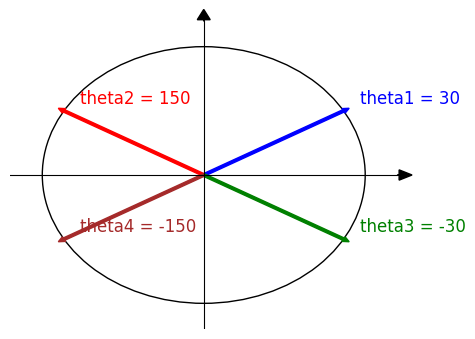

In [13]:
# Create the trigonometric axis
axes = TrigAxes(figsize=(5,4))

axes.addAngle(Angle(30, label='theta1 = 30', color='blue', linewidth=0.02))
axes.addAngle(Angle(150, label='theta2 = 150', color='red', linewidth=0.02))
axes.addAngle(Angle(-30, label='theta3 = -30', color='green', linewidth=0.02))
axes.addAngle(Angle(-150, label='theta4 = -150', color='brown', linewidth=0.02))

axes.draw()

<br><br><br><br>
<hr>
<br><br>
<div style = "color : blue;">

#### Manual Soloution

$$
\begin{align}
& \mathcal{P}(Y \leq y) = \begin{cases}p_1 & 0 \leq y \leq 1, \\ p_2 & -1 \leq y < 0. \end{cases} \implies \\
& p_1 = \mathcal{P}(Y \leq 0) + \mathcal{P}(Y \leq y, y > 0) = \mathcal{P}\left(\sin(2\pi X) \leq y, x \leq \frac{1}{2}\right) = \\
& \mathcal{P}(Y \leq 0) + \mathcal{P}\left(0 \leq x \leq \frac{\arcsin(y)}{2\pi}\right) + \mathcal{P}\left(\frac{\pi - \arcsin(y)}{2\pi} \leq x \leq \frac{\pi}{2\pi}\right)= \\
& \mathcal{P}(Y \leq 0) + \frac{\arcsin(y)}{2\pi} + \frac{\pi}{2\pi} - \frac{\pi - \arcsin(y)}{2\pi} = \mathcal{P}(Y \leq 0) + \frac{\arcsin(y)}{\pi}, \\
& p_2 = \mathcal{P}(Y \leq y, y < 0) = \mathcal{P}\left(\sin(2\pi X) \leq y, x > \frac{1}{2}\right) = \\
& \mathcal{P}\left(\frac{\frac{3\pi}{2}}{2\pi} \leq x \leq \frac{2\pi + \arcsin(y)}{2\pi}\right) + \mathcal{P}\left(\frac{\pi - \arcsin(y)}{2\pi} \leq x \leq \frac{\frac{3\pi}{2}}{2\pi}\right)= \\
& \frac{2\pi + \arcsin(y)}{2\pi} - \frac{\frac{3\pi}{2}}{2\pi} + \frac{\frac{3\pi}{2}}{2\pi} -  \frac{\pi - \arcsin(y)}{2\pi} = \\
& \frac{\pi}{2\pi} + \frac{2\arcsin(y)}{2\pi} = \frac{1}{2} + \frac{\arcsin(y)}{\pi} \implies \\
& \mathcal{P}(Y \leq 0) = \frac{1}{2} + \frac{\arcsin(0)}{\pi} = \frac{1}{2} \implies \\
& p_1 = \frac{1}{2} + \frac{\arcsin(y)}{\pi} \implies \\
& F_Y(y) = \begin{cases} 0 & y < -1, \\ \frac{1}{2} + \frac{\arcsin(y)}{\pi} & -1 \leq y < 1, \\ 1 & 
y \geq 1.\end{cases} \implies \\
& f_Y(y) = \begin{cases} \frac{1}{\pi\sqrt{1 - y^2}} & -1 < y < 1, \\ 0 & \text{Others}. \end{cases}
\end{align}
$$

<br><br><br><hr><br><br>

<div style = "color : blue;">

#### Python Soloution

In [23]:
Y = ContinuousRV(y, density = pDf, set = Interval.open(-1, 1))

In [24]:
density(Y)(y)

Piecewise((1/(pi*sqrt(1 - y**2)), (y > -1) & (y < 1)), (0, True))

In [25]:
cdf(Y)(y)

Piecewise((Piecewise((0, y < -1), (asin(Min(1, y))/pi + pi/(2*pi), True)), y >= -1), (0, True))

#### Expectation of Y

In [26]:
E(Y)

0

#### Variance of Y

In [30]:
variance(Y)

pi/(2*pi)